In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import linear_model

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [3]:
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset%20Update/x_train.csv'
x_train = pd.read_csv(url)

url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset%20Update/x_test.csv'
x_test = pd.read_csv(url)

url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset%20Update/y_train.csv'
y_train = pd.read_csv(url)

url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset%20Update/y_test.csv'
y_test = pd.read_csv(url)


In [4]:
x_train

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,MDAverage,MDSum,MDMin,MDMax
0,1.392183,1.270486,-1.288570,-0.275106,-0.036322,-1.158147,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,-0.989963,-1.355282,-0.885307,0.300999,-0.271794,-1.358972,-0.427943,-0.084662
1,-1.188910,-0.926810,-1.361242,-0.275106,-0.731251,-1.275919,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,0.466451,0.538139,0.615438,-1.082558,-0.271794,-1.358972,-0.427943,-0.084662
2,-1.188910,0.352213,1.400316,-0.275106,0.244469,0.455762,-0.252011,-0.037627,-0.084038,0.046557,0.081929,0.683805,-0.047383,0.615438,-1.082558,-0.049038,-0.245190,-0.252011,0.081929
3,0.140744,-1.221970,-0.125808,-0.275106,-0.086734,1.853757,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,-0.934874,0.135089,-0.885307,1.100205,-0.271794,-1.358972,-0.427943,-0.084662
4,0.062529,-1.156379,-1.724605,-0.275106,-2.430631,-1.249747,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,-1.013147,-1.110017,0.615438,-0.363967,-0.271794,-1.358972,-0.427943,-0.084662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330172,0.375389,-0.369287,1.424540,-0.275106,0.820144,0.998821,6.068185,-0.134782,-0.073029,6.259835,0.356177,-0.740830,0.149580,-0.885307,1.106191,2.495277,12.476386,-0.134782,6.259835
330173,1.392183,-0.598856,-0.610292,-0.275106,-1.946565,-0.460240,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,-0.981996,-1.434711,-0.885307,0.300999,-0.271794,-1.358972,-0.427943,-0.084662
330174,-0.641405,0.516190,1.109625,-0.275106,-0.264532,1.286708,3.053010,-0.173069,-0.061488,1.131793,0.261853,0.503592,0.325612,-0.885307,1.052305,0.842420,4.212100,-0.173069,3.053010
330175,-0.484975,-1.123583,-0.464947,-0.275106,-2.517904,-0.763393,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,0.525052,-0.722532,0.615438,-1.304202,-0.271794,-1.358972,-0.427943,-0.084662


In [5]:
reg = XGBRegressor(max_depth = 5, n_estimators = 150).fit(x_train,y_train)

In [6]:
reg.score(x_train, y_train)

0.9427443330944036

In [7]:
reg.score(x_test, y_test)

0.9409541781193819

In [8]:
y_pred = reg.predict(x_test)

In [9]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 5.83
Coefficient of determination: 0.94


In [44]:
params = { 'max_depth': [7,10,15],
           'learning_rate': [ 0.05, 0.1, 0.2],
           'n_estimators': [750, 1000, 1500],
           'colsample_bytree': [0.5, 0.7]}

In [45]:
xgbr = XGBRegressor(seed = 20)

In [46]:
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=2,
                   cv=3,
                   n_jobs=6
                   )

In [47]:
clf.fit(x_train, y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=7, n_estimators=750; total time= 4.2min
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=7, n_estimators=750; total time= 4.2min
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=7, n_estimators=750; total time= 4.3min
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=7, n_estimators=1000; total time= 5.5min
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=7, n_estimators=1000; total time= 5.5min
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=7, n_estimators=1000; total time= 5.6min
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=750; total time= 6.2min
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=750; total time= 6.2min
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=10, n_estimators=750; total time= 6.2min
[CV] END colsample_bytr

/Users/eric/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=7, n_estimators=1000; total time= 5.7min
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=7, n_estimators=1000; total time= 5.7min
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=7, n_estimators=1000; total time= 5.8min
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=750; total time= 6.6min
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=750; total time= 6.7min
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=750; total time= 6.7min
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=7, n_estimators=1500; total time= 8.6min
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=7, n_estimators=1500; total time= 8.6min
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=7, n_estimators=1500; total time= 8.5min
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, n_estimators=1000

In [49]:
evalset =[(x_train, y_train),(x_test, y_test)]
best_xgb = XGBRegressor(colsample_bytree=0.7, learning_rate=0.05, max_depth=15, n_estimators=1500).fit(x_train,y_train, eval_metric='rmse', eval_set=evalset)

/Users/eric/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:20.85863	validation_1-rmse:20.83497
[1]	validation_0-rmse:19.85271	validation_1-rmse:19.83312
[2]	validation_0-rmse:18.87636	validation_1-rmse:18.85888
[3]	validation_0-rmse:18.12901	validation_1-rmse:18.11191
[4]	validation_0-rmse:17.24039	validation_1-rmse:17.22553
[5]	validation_0-rmse:16.57357	validation_1-rmse:16.55941
[6]	validation_0-rmse:15.76268	validation_1-rmse:15.75041
[7]	validation_0-rmse:14.99312	validation_1-rmse:14.98259
[8]	validation_0-rmse:14.42884	validation_1-rmse:14.41909
[9]	validation_0-rmse:13.74606	validation_1-rmse:13.74001
[10]	validation_0-rmse:13.07811	validation_1-rmse:13.07384
[11]	validation_0-rmse:12.60177	validation_1-rmse:12.59879
[12]	validation_0-rmse:11.99301	validation_1-rmse:11.99190
[13]	validation_0-rmse:11.56905	validation_1-rmse:11.56915
[14]	validation_0-rmse:11.01211	validation_1-rmse:11.01411
[15]	validation_0-rmse:10.48285	validation_1-rmse:10.48719
[16]	validation_0-rmse:9.98300	validation_1-rmse:9.98967
[17]	vali

In [50]:
best_xgb.score(x_train, y_train)

0.9993628737617664

In [51]:
best_xgb.score(x_test, y_test)

0.988582258570714

In [52]:
y_pred = best_xgb.predict(x_test)

In [53]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 1.13
Coefficient of determination: 0.99


In [54]:
results = best_xgb.evals_result()

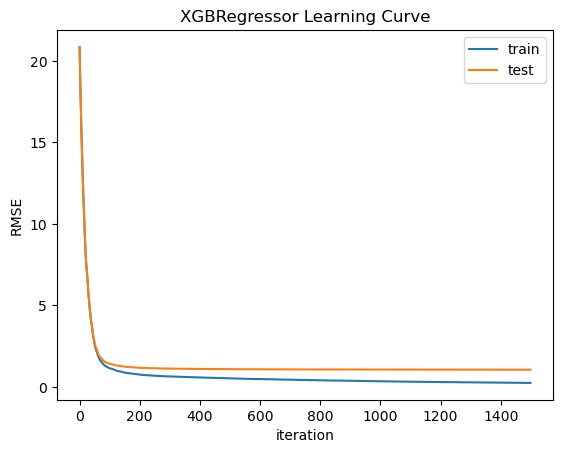

In [56]:
plt.plot(results['validation_0']['rmse'], label='train')
plt.plot(results['validation_1']['rmse'], label='test')
# show the legend
plt.legend()
plt.title('XGBRegressor Learning Curve')
plt.xlabel('iteration')
plt.ylabel('RMSE')
# show the plot
plt.show()

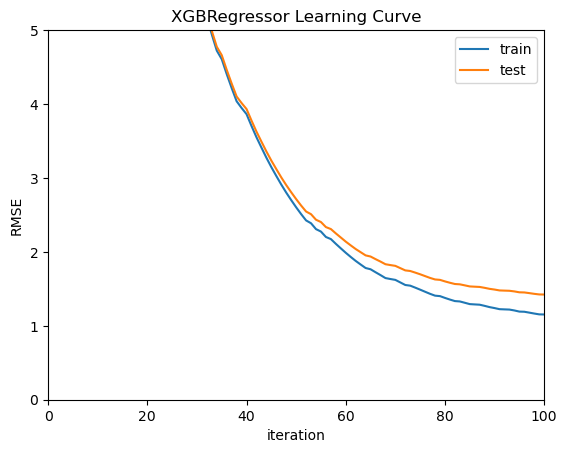

In [57]:
plt.plot(results['validation_0']['rmse'], label='train')
plt.plot(results['validation_1']['rmse'], label='test')
# show the legend
plt.legend()
plt.title('XGBRegressor Learning Curve')
plt.xlabel('iteration')
plt.ylabel('RMSE')
plt.xlim(0, 100)
plt.ylim(0, 5)
# show the plot
plt.show()

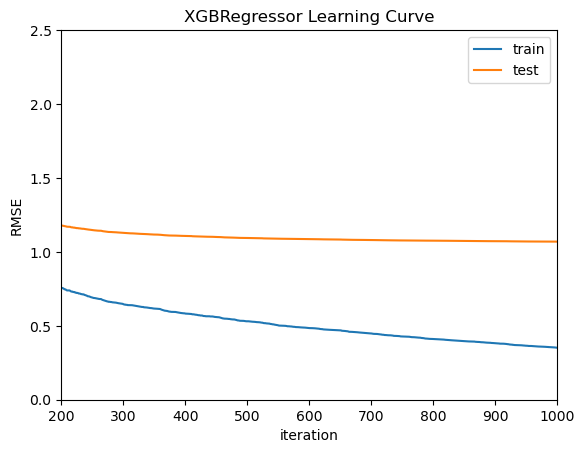

In [58]:
plt.plot(results['validation_0']['rmse'], label='train')
plt.plot(results['validation_1']['rmse'], label='test')
# show the legend
plt.legend()
plt.title('XGBRegressor Learning Curve')
plt.xlabel('iteration')
plt.ylabel('RMSE')
plt.xlim(200, 1000)
plt.ylim(0, 2.5)
# show the plot
plt.show()

Prediction

In [59]:
#provided submission test dataset
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Datasets/test.csv'
test = pd.read_csv(url)

#test dataset after preprocessing
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset%20Update/Submission%20Test.csv'
submission_test = pd.read_csv(url)

Final Submission Format:

Id,Weekly_Sales

1_1_2012-11-02,0

1_1_2012-11-09,0

1_1_2012-11-16,0

In [60]:
Id = test['Store'].astype('string') + '_' + test['Dept'].astype('string') + '_' + test['Date'].astype('string')
Id

0           1_1_2012-11-02
1           1_1_2012-11-09
2           1_1_2012-11-16
3           1_1_2012-11-23
4           1_1_2012-11-30
                ...       
115059    45_98_2013-06-28
115060    45_98_2013-07-05
115061    45_98_2013-07-12
115062    45_98_2013-07-19
115063    45_98_2013-07-26
Length: 115064, dtype: string

In [61]:
submission_test

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,MDAverage,MDSum,MDMin,MDMax
0,-1.657956,-1.413724,-1.683055,-0.290032,0.073606,-0.816679,-0.085347,0.316895,-0.162850,0.091459,-0.060954,1.170390,0.569095,-0.886164,0.242483,0.019840,0.099201,-0.162850,0.316895
1,-1.657956,-1.381105,-1.683055,-0.290032,0.073606,-0.816679,-0.085347,0.316895,-0.162850,0.091459,-0.060954,1.170390,0.569095,-0.886164,0.242483,0.019840,0.099201,-0.162850,0.316895
2,-1.657956,-1.348485,-1.683055,-0.290032,0.073606,-0.816679,-0.085347,0.316895,-0.162850,0.091459,-0.060954,1.170390,0.569095,-0.886164,0.242483,0.019840,0.099201,-0.162850,0.316895
3,-1.657956,-1.315865,-1.683055,-0.290032,0.073606,-0.816679,-0.085347,0.316895,-0.162850,0.091459,-0.060954,1.170390,0.569095,-0.886164,0.242483,0.019840,0.099201,-0.162850,0.316895
4,-1.657956,-1.283245,-1.683055,-0.290032,0.073606,-0.816679,-0.085347,0.316895,-0.162850,0.091459,-0.060954,1.170390,0.569095,-0.886164,0.242483,0.019840,0.099201,-0.162850,0.316895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,1.776894,1.587292,1.692932,-0.290032,1.181271,0.929055,-0.698176,-0.264229,-0.166549,-0.411733,-0.105842,-1.315901,-1.317896,0.608889,-0.299095,-0.329306,-1.646529,-0.698176,-0.105842
115060,1.776894,1.619912,1.692932,-0.290032,1.181271,0.929055,-0.698176,-0.264229,-0.166549,-0.411733,-0.105842,-1.315901,-1.317896,0.608889,-0.299095,-0.329306,-1.646529,-0.698176,-0.105842
115061,1.776894,1.652532,1.692932,-0.290032,1.181271,0.929055,-0.698176,-0.264229,-0.166549,-0.411733,-0.105842,-1.315901,-1.317896,0.608889,-0.299095,-0.329306,-1.646529,-0.698176,-0.105842
115062,1.776894,1.717771,1.692932,-0.290032,1.181271,0.929055,-0.698176,-0.264229,-0.166549,-0.411733,-0.105842,-1.315901,-1.317896,0.608889,-0.299095,-0.329306,-1.646529,-0.698176,-0.105842


In [62]:
y_pred = best_xgb.predict(submission_test)
y_pred

array([27.93152 , 35.384254, 21.31951 , ..., 39.12991 , 20.293169,
        8.566906], dtype=float32)

In [63]:
weekly_sales = y_pred**3
weekly_sales

array([21791.33   , 44302.695  ,  9690.175  , ..., 59913.754  ,
        8356.985  ,   628.74133], dtype=float32)

In [64]:
weekly_sales[0]

21791.33

In [65]:
sub = {'Id':Id, 'Weekly_Sales':weekly_sales}
xgb_submission = pd.DataFrame(data=sub)

xgb_submission['Weekly_Sales'] = round(xgb_submission['Weekly_Sales'], 2)

xgb_submission

,Id,Weekly_Sales
0,1_1_2012-11-02,21791.330078
1,1_1_2012-11-09,44302.699219
2,1_1_2012-11-16,9690.179688
3,1_1_2012-11-23,34991.578125
4,1_1_2012-11-30,29268.949219
...,...,...
115059,45_98_2013-06-28,2946.270020
115060,45_98_2013-07-05,1211.280029
115061,45_98_2013-07-12,59913.761719
115062,45_98_2013-07-19,8356.990234


In [66]:
xgb_submission.to_csv('Submission Files/XGBoost Best.csv', float_format='%.2f',index=False)